In [5]:
import numpy as np

F = np.fromfile('../data/feature')

F.shape


(169987502,)

In [170]:
f = F[2:]

f.resize(1511, 112500)
f.shape

(1511, 112500)

In [174]:
f

array([[ 0.62787946,  0.6120301 ,  0.55039168, ...,  0.03053857,
         0.03113092,  0.02245835],
       [ 0.03197318,  0.0386616 ,  0.02497441, ...,  0.56901458,
         0.46497135,  0.54158152],
       [ 0.49920462,  0.53893527,  0.56012663, ..., -0.03781372,
        -0.05211615, -0.04317577],
       ...,
       [ 0.00863989,  0.02657727,  0.05187133, ...,  0.4200143 ,
         0.42852588,  0.49233397],
       [ 0.44391746,  0.43359871,  0.35405194, ..., -0.2018445 ,
        -0.1570146 , -0.29429871],
       [-0.23723762, -0.35991911, -0.2402722 , ...,  0.2171471 ,
         0.1590347 ,  0.24011561]])

In [171]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
newf = pca.fit_transform(f)

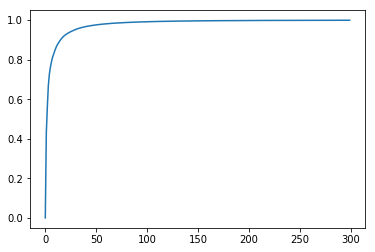

In [149]:

y = [np.sum(pca.explained_variance_ratio_[0:i]) for i in range(0, 300)]
x = [i for i in range(0, 300)]
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.savefig('pca_figure.jpg')
plt.show()

In [150]:
y[299]

0.998851145492537


X = []
Y = []
Z = []
for i in range(1511):
    for j in range(120):
        X.append(i)
        Y.append(j)
        Z.append(newf[i, j])
        
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X, Y, Z)

In [173]:
newf.shape
newf

array([[-22.61672739, -15.76507277,  -7.9510335 , ...,  -6.0433447 ,
          8.94985265,   7.5245439 ],
       [-14.8383872 , -19.27796292,   4.65518322, ...,  -0.94689261,
         -6.09424111,   5.58084027],
       [ -7.37143016,   1.04390874, -15.48473393, ..., -22.03193372,
         41.70219416, -37.65098854],
       ...,
       [-14.00986388, -13.75865726,  -6.40675306, ...,   7.76580975,
         -0.34200866,  -4.34356053],
       [-23.49930234,  -8.11748035, -18.83850701, ...,  -6.65143589,
         -0.11507443,   1.07513307],
       [-21.4054662 , -16.35867225,  -3.67280082, ...,  -3.45652468,
          1.39383321,   6.41386209]])

In [165]:
x = np.random.rand(1, 120)*0.0001-0.00005
x

array([[ 2.22469316e-05,  5.29723604e-06, -1.50050694e-05,
         4.54943369e-05, -2.72900820e-05,  2.51691355e-05,
        -7.34208643e-06,  4.57329740e-05, -4.82043041e-05,
        -1.59521458e-06,  4.34943470e-05, -4.16497275e-05,
        -2.44735438e-05,  1.85764515e-05,  4.71748837e-05,
         4.83238208e-05, -3.26565404e-05, -1.03849486e-05,
         2.25612682e-05, -4.39582811e-05, -2.94854850e-06,
        -1.00489598e-05,  4.46276749e-05, -2.90254942e-05,
        -3.51190677e-05, -3.73870526e-05, -4.22438857e-05,
         1.72059378e-05,  2.00920174e-05, -2.42779934e-05,
        -8.46186041e-06,  3.71975317e-05, -2.86292754e-05,
         3.65007218e-05, -1.58090428e-05, -2.40283615e-05,
         2.22375398e-05, -8.07342360e-07,  4.89155783e-05,
         4.86838750e-05, -4.76798343e-05, -5.50152486e-06,
         3.63542209e-06, -4.88122466e-05, -4.36838565e-05,
         2.64631623e-05,  2.86378261e-05,  4.54046565e-05,
        -3.36975083e-05,  4.00842397e-05, -3.01444509e-0

In [175]:
newx = np.dot(newf[1, :], pca.components_)

In [178]:
diff = ((newx - f[1, :])**2).sum()
diff

6119.651487516827

In [179]:
np.savetxt('../data/T.txt',newx, delimiter=' ')

In [180]:
newx.shape

(112500,)